In [66]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sb;
import sklearn
import seaborn as sns


In [67]:
dataframe=pd.read_csv('E:\MS CS spring 2022\CS 57300\project\yield.csv')

In [68]:
dataframe.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [69]:
dataframe_yield = dataframe.rename(index=str, columns={"Value": "yield"})
dataframe_yield.shape

(56717, 12)

In [70]:
dataframe_yield.shape

(56717, 12)

In [71]:
dataframe_yield = dataframe_yield.drop(['Year Code','Element Code','Element','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
dataframe_yield.head()

,Area,Item,Year,yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [72]:
dataframe_yield.isnull().sum()

Area     0
Item     0
Year     0
yield    0
dtype: int64

In [73]:
dataframe_rain=pd.read_csv('E:\\MS CS spring 2022\\CS 57300\\project\\rainfall (1).csv')

In [74]:
dataframe_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [75]:
dataframe_rain = dataframe_rain.rename(index=str, columns={" Area": 'Area'})

In [76]:
dataframe_rain.isnull().sum()

Area                               0
Year                               0
average_rain_fall_mm_per_year    774
dtype: int64

In [77]:
dataframe_rain = dataframe_rain.dropna()

In [78]:
dataframe_rain.isnull().sum()

Area                             0
Year                             0
average_rain_fall_mm_per_year    0
dtype: int64

In [79]:
dataframe_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(dataframe_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
dataframe_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5953 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           5953 non-null   object 
 1   Year                           5953 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 186.0+ KB


In [80]:
yield_merged = pd.merge(dataframe_yield, dataframe_rain, on=['Year','Area'])

In [81]:
yield_merged.shape

(25400, 5)

In [82]:
dataframe_pesticides=pd.read_csv('E:\\MS CS spring 2022\\CS 57300\\project\\pesticides (1).csv')

In [83]:
dataframe_pesticides.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [84]:
dataframe_pesticides = dataframe_pesticides.rename(index=str, columns={"Value": "pesticides_tonnes"})
dataframe_pesticides = dataframe_pesticides.drop(['Element','Domain','Unit','Item'], axis=1)
dataframe_pesticides.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [85]:
dataframe_pesticides.isnull().sum()

Area                 0
Year                 0
pesticides_tonnes    0
dtype: int64

In [86]:
yield_merged = pd.merge(yield_merged,dataframe_pesticides , on=['Year','Area'])
yield_merged.shape

(18955, 6)

In [87]:
yield_merged.head()

,Area,Item,Year,yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


In [88]:
dataframe_temp=pd.read_csv('E:\\MS CS spring 2022\\CS 57300\\project\\temp.csv')

In [89]:
dataframe_temp.tail()

,year,country,avg_temp
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52
71310,2013,Mexico,22.19


In [90]:
dataframe_temp = dataframe_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
dataframe_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [91]:
dataframe_temp.isnull().sum()

Year           0
Area           0
avg_temp    2547
dtype: int64

In [92]:
dataframe_temp = dataframe_temp.dropna()

In [35]:
dataframe_temp.isnull().sum()

Year        0
Area        0
avg_temp    0
dtype: int64

In [36]:
yield_merged = pd.merge(yield_merged,dataframe_temp, on=['Area','Year'])
yield_merged.head()

,Area,Item,Year,yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [37]:
yield_merged.shape

(28248, 7)

In [38]:
yield_merged.groupby('Item').count()

,Area,Year,yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2047,2047,2047,2045,2047,2047
Maize,4123,4123,4123,4121,4123,4123
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2892,2892,2892,2890,2892,2892
Wheat,3857,3857,3857,3857,3857,3857


In [39]:
yield_merged.describe()

,Year,yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28248.000000,28248.000000,28242.00000,28248.000000,28248.000000
mean,2001.541950,77047.863282,1149.05598,37069.136973,20.543722
std,7.052997,84950.194454,709.81215,59954.787836,6.311828
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19918.750000,593.00000,1695.710000,16.710000
50%,2001.000000,38295.000000,1083.00000,17517.760000,21.510000
75%,2008.000000,104598.250000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [40]:
yield_merged['Area'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [41]:
yield_merged['Area'].nunique()

101

In [42]:
yield_merged['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013], dtype=int64)

In [43]:
yield_merged['Year'].nunique()

23

In [44]:
yield_merged.groupby(['Area'],sort=True)['yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: yield, dtype: int64

In [45]:
yield_merged.groupby(['Item','Area'],sort=True)['yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: yield, dtype: int64

C:\Users\user\AppData\Local\Temp/ipykernel_4520/2152204817.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_data, dtype=np.bool)


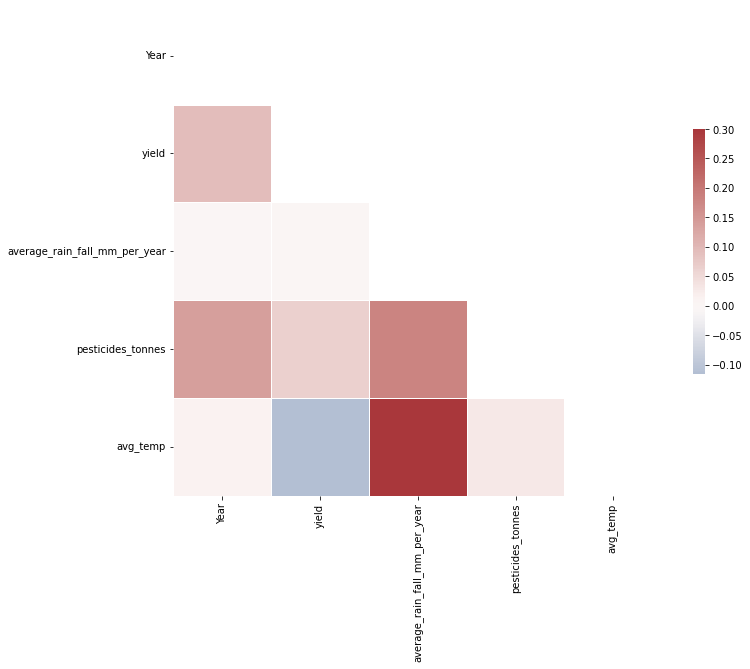

In [46]:
correlation_data=yield_merged.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<AxesSubplot:>

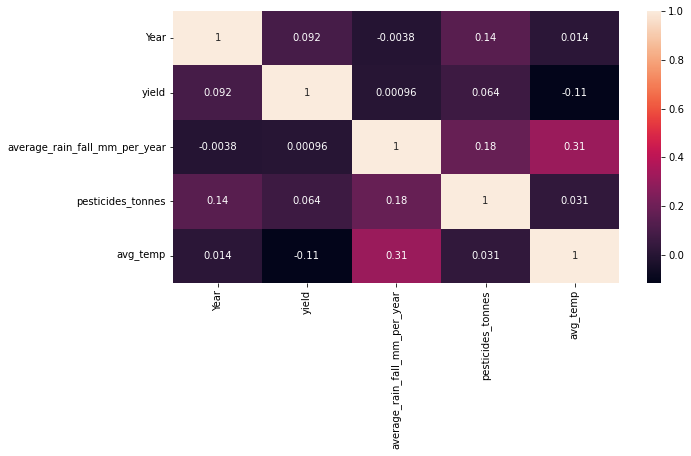

In [51]:
plt.figure(figsize=[10,5])
sb.heatmap(yield_merged.corr(),annot=True)

In [52]:
yield_merged.dtypes

Area                              object
Item                              object
Year                               int64
yield                              int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
yield_df_onehot = pd.get_dummies(yield_merged, columns=['Area',"Item"], prefix = ['Country',"Item"])

In [55]:
yield_df_onehot.head()

,Year,yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,36613,1485.0,121.0,16.37,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,66667,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,23333,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,12500,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,7000,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [56]:
yield_df_onehot.shape

(28248, 116)

In [57]:
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'yield']

In [58]:
features

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.00,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.00,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.00,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.00,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.00,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28243,2013,657.0,2550.07,19.76,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
28244,2013,657.0,2550.07,19.76,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
28245,2013,657.0,2550.07,19.76,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
28246,2013,657.0,2550.07,19.76,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
label=yield_merged['yield']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
features = features.drop(['Year'], axis=1)

In [61]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28248 entries, 0 to 28247
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: float64(3), uint8(111)
memory usage: 3.9 MB


In [62]:
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

In [65]:
features.shape

(28248, 114)